In [ ]:
# Import the necessary libraries
import numpy
import matplotlib.pyplot as plot
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving salaryData.csv to salaryData.csv


In [ ]:
! pwd

/content


In [ ]:
# Import the dataset into pandas dataframe
dataset = pandas.read_csv('salaryData.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [ ]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
# Split the dataset into the training set and test set

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [ ]:
print(xTrain.size)
print(xTest.size)

20
10


In [ ]:
xTest

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [ ]:
xTrain

array([[ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [ ]:
# Creating a LinearRegression object and fitting it on our training set.
linearRegressor = LinearRegression()
linearRegressor.fit(xTrain, yTrain)

# Predicting the test set results
yPrediction = linearRegressor.predict(xTest)

In [ ]:
yPrediction

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [ ]:
yTest

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [ ]:
print('Coefficients: \n', linearRegressor.coef_)
print('Intercept: \n', linearRegressor.intercept_)

Coefficients: 
 [9345.94244312]
Intercept: 
 26816.192244031183


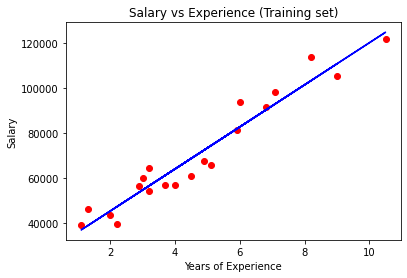

In [ ]:
# Visualising the training set results
plot.scatter(xTrain, yTrain, color = 'red')
plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plot.title('Salary vs Experience (Training set)')
plot.xlabel('Years of Experience')
plot.ylabel('Salary')
plot.show()

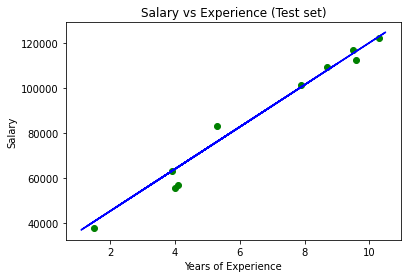

In [ ]:
# Visualising the test set results
plot.scatter(xTest, yTest, color = 'green')
plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plot.title('Salary vs Experience (Test set)')
plot.xlabel('Years of Experience')
plot.ylabel('Salary')
plot.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print (r2_score(yTest, yPrediction))

0.9749154407708353


In [ ]:
print(mean_squared_error(yTest, yPrediction))

21026037.329511296


In [ ]:
linearRegressor.score(xTest, yTest) # score() in regression problems outputs R2 score only

0.9749154407708353